### 1.  Kmeans 예제

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [3]:
# 데이터 임의로 생성하기
data = make_blobs(n_samples = 10, n_features = 2, centers=4, random_state = 100)
data[0]

array([[-10.3437585 ,  -8.68693583],
       [  3.16310256,   5.67461936],
       [  3.59950039,   7.4541373 ],
       [ -8.28664122,  -6.02701241],
       [ -2.09324324,   7.71236972],
       [  1.08927851,  -5.50265563],
       [  0.41007185,  -3.99744881],
       [ -0.83692738,   6.7911115 ],
       [ -2.04092856,   7.92525533],
       [  0.678603  ,  -4.17761085]])

In [5]:
# target
print(data[1])
# 2차원 x , y 축 중에서 y 축에 해당하는 값
print(data[0][:, 1])

[2 3 3 2 1 0 0 1 1 0]
[-8.68693583  5.67461936  7.4541373  -6.02701241  7.71236972 -5.50265563
 -3.99744881  6.7911115   7.92525533 -4.17761085]


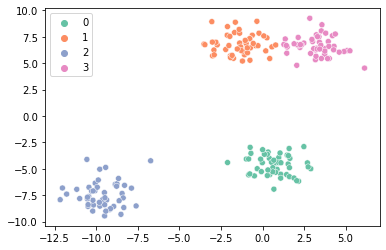

In [6]:
# 데이터 임으로 생성해서 plot 으로 확인해보기
data = make_blobs(n_samples = 200, n_features = 2, centers=4, random_state = 100)

sns.scatterplot(x = data[0][:, 0], y = data[0][:,1], hue = data[1], palette = 'Set2')
plt.show()

In [9]:
# 4개의 군집으로 임의 생성하였기 때문에 잘 분류하는지 확인
model = KMeans(n_clusters = 4)
model.fit(data[0])

model.labels_

array([2, 2, 2, 2, 3, 2, 1, 1, 3, 3, 0, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 2,
       0, 1, 0, 0, 3, 2, 3, 0, 0, 1, 0, 2, 2, 3, 0, 0, 2, 3, 2, 2, 0, 1,
       0, 1, 0, 3, 0, 2, 2, 0, 2, 0, 2, 0, 0, 3, 1, 1, 1, 2, 0, 1, 2, 1,
       3, 2, 1, 2, 1, 3, 1, 2, 1, 2, 0, 1, 1, 2, 1, 0, 2, 2, 0, 1, 3, 0,
       3, 0, 1, 2, 3, 0, 2, 2, 0, 1, 3, 2, 1, 3, 0, 1, 3, 3, 0, 0, 1, 3,
       3, 0, 1, 3, 1, 0, 3, 1, 2, 2, 2, 1, 0, 2, 2, 0, 3, 0, 3, 3, 3, 0,
       0, 1, 0, 2, 3, 0, 0, 3, 0, 3, 1, 2, 2, 1, 1, 3, 1, 3, 1, 2, 0, 2,
       2, 0, 3, 3, 1, 3, 1, 1, 1, 3, 2, 1, 2, 0, 0, 3, 1, 3, 1, 3, 0, 3,
       3, 1, 2, 2, 1, 1, 3, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 3, 3, 2,
       1, 0])

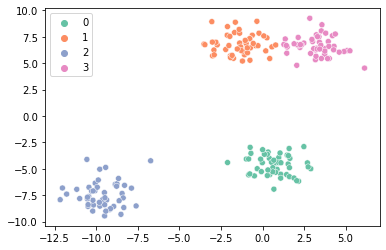

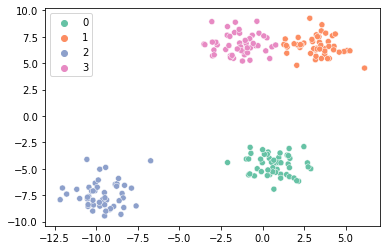

In [11]:
# 실제 분류값과 예측값 plot으로 확인
sns.scatterplot(x=data[0][:, 0], y = data[0][:,1], hue = data[1], palette = 'Set2')
plt.show()

sns.scatterplot(x=data[0][:, 0], y = data[0][:,1], hue = model.labels_, palette = 'Set2')
plt.show()

In [12]:
# 각 군집들의 중심값
print(model.cluster_centers_ )

# 센터와 개체들간의 거리를 수치화한 것으로 값이 크다는 것은 센터로 부터 멀리 퍼져있다는 것
# 군집이 많이지게 되면 inertia가 작아지게 됨. 적절한 군집인지는 확인이 필요함
print(model.inertia_ )

[[ 0.72218432 -4.64441009]
 [ 3.25526355  6.63529725]
 [-9.64972986 -7.46180493]
 [-1.3849113   6.78514243]]
428.6910143243812


[3855.3908583820526, 967.5329197924485, 428.6910143243812, 377.0923630431555, 330.72156818256235, 293.8996841969634, 265.9504878236568, 235.31298960548477, 206.9321232840639]


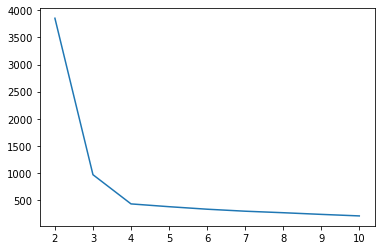

In [13]:
# 적절한 분류를 위하여 inertia_ 값 비교
distance  = []
for i in range(2,11):
    model = KMeans(n_clusters = i)
    model.fit(data[0])  
    distance.append(model.inertia_)

print(distance)

#  
sns.lineplot(x = list(range(2, 11)), y = distance)
plt.show()

### 2. 예제 데이터 실습

#### 2-1) 데이터 불러오기

In [14]:
path_dir = os.getcwd()
data = pd.read_csv(path_dir + '/data/Mall_Customers.csv', index_col = 0)

display(data.head())
display(data.info())
data.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


None

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


#### 2-2) 군집수 3개로 분류해보기

In [15]:
data = pd.get_dummies(data, columns = ['Gender'], drop_first = True)

model = KMeans(n_clusters=3)
model.fit(data)

result_df = data.copy()
result_df['label'] = model.labels_

display(result_df.groupby(['label']).mean())
result_df['label'].value_counts()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
label,,,,
0,40.394737,87.000000,18.631579,0.526316
1,32.692308,86.538462,82.128205,0.461538
2,40.325203,44.154472,49.829268,0.406504


2    123
1     39
0     38
Name: label, dtype: int64

#### 2-3) 군집 수에 따른 inertia 값 비교해보기

[212889.44245524294, 143391.59236035674, 104414.67534220174, 75528.58656469136, 58348.64136331504, 51130.69008126375, 44355.31351771351, 40670.989962363215, 37061.44064232065]


<AxesSubplot:>

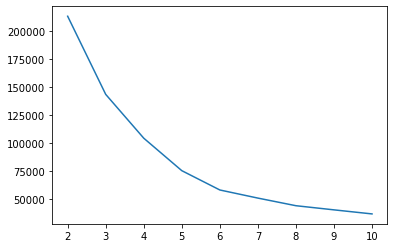

In [16]:
distance = []

for i in range(2, 11):
    model = KMeans(n_clusters = i)
    model.fit(data)
    distance.append(model.inertia_)

print(distance)

sns.lineplot(x = list(range(2, 11)), y=distance)

#### 2-3-1) 실루엣(silhouette) 계수
- Elbow의 단점을 고려한 방법
- 값이 클수록 좋음

<AxesSubplot:>

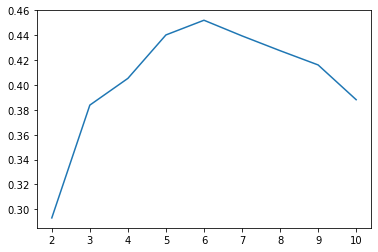

In [21]:
from sklearn.metrics import silhouette_score

sil = []

for i in range(2, 11):
    model = KMeans(n_clusters=i)
    model.fit(data)
    sil.append(silhouette_score(data, model.labels_))
    
sns.lineplot(x=list(range(2, 11)), y=sil)

In [22]:
model = KMeans(n_clusters=6)
model.fit(data)

data['labels'] = model.labels_

# 클러스터가 많아지면 해석이 어려워짐
data.groupby('labels').mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
labels,,,,
0,41.685714,88.228571,17.285714,0.571429
1,25.272727,25.727273,79.363636,0.409091
2,32.692308,86.538462,82.128205,0.461538
3,44.142857,25.142857,19.523810,0.380952
4,56.155556,53.377778,49.088889,0.444444
5,27.000000,56.657895,49.131579,0.342105


#### 2-4) 군집 특성 확인

<AxesSubplot:xlabel='labels', ylabel='Age'>

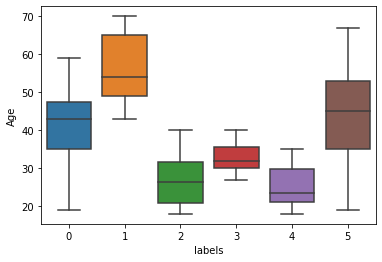

In [45]:
sns.boxplot(x = 'labels', y = 'Age', data=data)

<AxesSubplot:xlabel='labels', ylabel='Annual Income (k$)'>

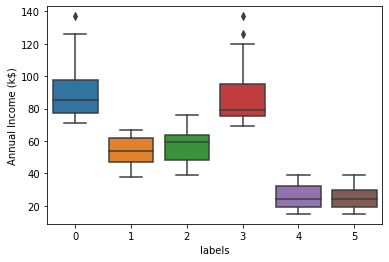

In [47]:
sns.boxplot(x = 'labels', y = 'Annual Income (k$)', data=data)

<AxesSubplot:xlabel='labels', ylabel='Spending Score (1-100)'>

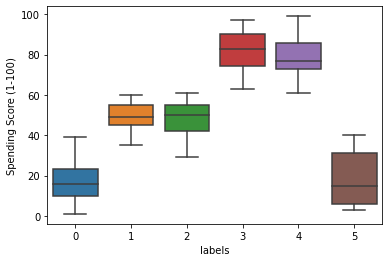

In [48]:
sns.boxplot(x = 'labels', y = 'Spending Score (1-100)', data=data)

#### PCA로 변수 축소하여 군집별 특성 파악

In [25]:
data.drop('labels', axis = 1, inplace=True)

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(data)
pca_df = pca.transform(data)

pca_df = pd.DataFrame(pca_df, columns = ['PC1', 'PC2'])
pca_df.head()

,PC1,PC2
0,-31.869945,-33.001252
1,0.764494,-56.842901
2,-57.408276,-13.124961
3,-2.168543,-53.478590
4,-32.174085,-30.388412


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

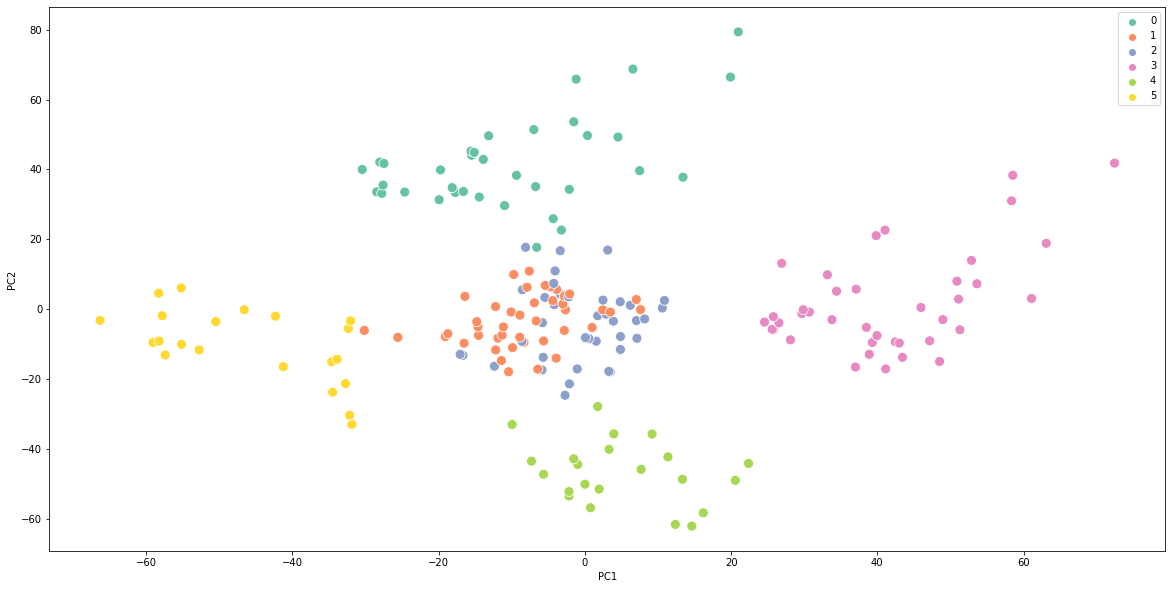

In [58]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue = model.labels_, palette='Set2', s=100)